In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
x, y = make_blobs(n_samples=100, centers=2, n_features=2)

In [3]:
x.shape

(100, 2)

In [4]:
y.shape

(100,)

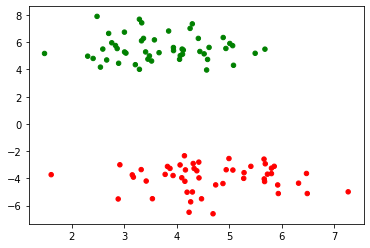

In [5]:
plt.scatter(x[:, 0], x[:, 1], s=20, c=np.array(['red', 'green'])[y])

In [6]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(x.shape[0]), x]
x[:5]

array([[ 1.        ,  4.2974137 , -4.99910238],
       [ 1.        ,  5.80328823, -3.25113664],
       [ 1.        ,  6.48535438, -5.11391776],
       [ 1.        ,  6.31962488, -4.35297073],
       [ 1.        ,  4.58604321,  4.73408119]])

In [7]:
y[:5]

array([0, 0, 0, 0, 1])

In [8]:
# задаем шаг градиентного спуска
alpha = 0.01

In [9]:
def gradient_descent_logistic_regression(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # кол-во элементов
    theta = np.ones(3) # веса модели, изначально задаем как [1, 1, 1]
    x_transpose = x.transpose() # транспонируем матрицу x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение

        a = 1/(1+np.exp(-hypothesis)) # функция сигмоиды
        
        loss = -y*np.log(a)-(1-y)*np.log(1-a) # loss функция
        
        J = np.sum(loss)/m # суммарная функция потерь
        print(iter , 'J: ', J)
        
        gradient = (a-y)@x   
        
        theta = theta - alpha * gradient 
    
    return theta

In [10]:
theta = gradient_descent_logistic_regression(alpha, x, y, 100)

0 J:  1.008796172883742
1 J:  6.602816941447138e-05
2 J:  6.589266727000325e-05
3 J:  6.57577966604913e-05
4 J:  6.562355315266543e-05
5 J:  6.548993235468457e-05
6 J:  6.535692991565942e-05
7 J:  6.522454152512595e-05
8 J:  6.509276291262006e-05
9 J:  6.496158984718358e-05
10 J:  6.483101813696325e-05
11 J:  6.47010436286968e-05
12 J:  6.457166220725987e-05
13 J:  6.444286979537069e-05
14 J:  6.431466235292288e-05
15 J:  6.418703587678117e-05
16 J:  6.405998640021195e-05
17 J:  6.39335099925657e-05
18 J:  6.380760275880647e-05
19 J:  6.368226083914221e-05
20 J:  6.35574804085741e-05
21 J:  6.34332576765981e-05
22 J:  6.330958888675427e-05
23 J:  6.318647031623286e-05
24 J:  6.306389827552136e-05
25 J:  6.294186910805623e-05
26 J:  6.282037918982873e-05
27 J:  6.269942492901123e-05
28 J:  6.257900276559756e-05
29 J:  6.245910917112359e-05
30 J:  6.233974064822335e-05
31 J:  6.222089373033393e-05
32 J:  6.210256498135281e-05
33 J:  6.198475099531498e-05
34 J:  6.186744839602251e-05
35 J

In [11]:
theta

array([ 0.61852575, -0.86147461,  2.48142551])

In [12]:
y_pred = x@theta
y_pred

array([-15.48848721, -12.4483131 , -17.65824836, -15.62724324,
         8.41503579, -12.81302006,   9.17774356, -14.57985861,
        10.97937143, -12.1520585 ,  12.89496952, -12.73717472,
         9.04974269,  10.52299714,  15.14864648,   6.9249269 ,
       -16.88316951, -13.47305288, -14.28606425,  11.88302434,
       -10.42578102,  10.44527282,  12.18040836,   9.55812744,
         8.64643377, -11.99217127,  12.40116301,   9.78401541,
        10.91177165,  10.4740778 , -10.6756211 ,  14.75594539,
       -12.17465237, -17.25946045, -14.45369186, -15.44103053,
        14.23190513, -11.83575362, -11.3511434 , -13.41654666,
         7.73375088, -19.80011136, -19.12872776, -17.1823034 ,
       -10.01636225,   9.48742304,  13.30685611,  18.07560814,
       -13.02955118,   8.77193886,  10.95952603,  14.78371887,
       -12.72263846,   9.99046756,  14.35782586, -12.1571609 ,
       -10.31338746,  -9.34167861,  10.51459827,   9.44821039,
       -11.70030947, -11.23305297, -10.56990214, -11.77

In [13]:
def get_labels(y_pred, treshhold=0.5):
    y_corr = []
    for i in y_pred:
        if i >= treshhold:
            y_corr.append(1)
        else:
            y_corr.append(0)
    return y_corr

In [14]:
y_pred2 = get_labels(y_pred)

In [15]:
for i in zip(y_pred2, y):
    print(i)

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(1, 1)


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_pred2,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# Используем готовые методы

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()

In [19]:
model.fit( x, y )
predictions = model.predict_proba( x )

In [20]:
predictions[:5]

array([[9.99446581e-01, 5.53419125e-04],
       [9.96130126e-01, 3.86987426e-03],
       [9.99704295e-01, 2.95705079e-04],
       [9.99174355e-01, 8.25645176e-04],
       [5.96377347e-03, 9.94036227e-01]])

In [21]:
model.score(x, y)

1.0

In [22]:
# коэффициенты модели
model.coef_

array([[-0.02474889, -0.21822292,  1.30254372]])

In [23]:
# коэффициенты "ручного" способа
theta

array([ 0.61852575, -0.86147461,  2.48142551])

In [24]:
y_pred_model = model.predict(x)
y_pred_model

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [25]:
print(classification_report(y_pred_model,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

